# Automatically Select Hyperparameters
There is a way to automatically select the best hyperparameters for a model. Here is some data imported from `sklearn.datasets` to use as an example.

<AxesSubplot:xlabel='x1', ylabel='x2'>

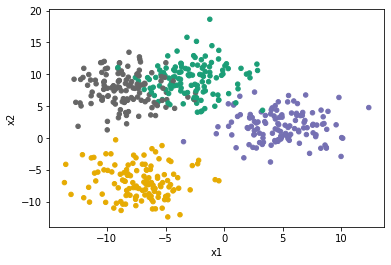

In [1]:
from pandas import DataFrame
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=500, centers=4, cluster_std=2.5, random_state=42)
X = DataFrame(X, columns=["x1", "x2"])

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

X.plot.scatter("x1", "x2", c=y, colormap="Dark2", colorbar=False)

`sklearn.model_selection` provides a tool called `GridSearchCV` which will rerun model training for every hyperparameter it is passed. The `GridSearchCV` constructor takes in two parameters:
* The chosen model to explore
* Dictionary containing hyperparameters

Below is an example using `KNearestNeighbors`, where we want to discover the best value for `_neighbours` from 1-49.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 50),
}
models = GridSearchCV(KNeighborsClassifier(), parameters)

The object is then fit like any other model with the training data being passed in.

In [4]:
models.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

To understand what `GridSearchCV` has done, `mean_test_score` from `cv_results` can be plotted against each value of `n_neighbors`. Each test will be run several times with different splits of validation data from the training data to provide some uncertainty to the scores.

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

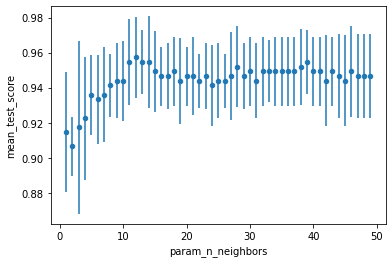

In [6]:
cv_results = DataFrame(models.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

the clf object (`models`) can be used just like a normal `KNearestNeighbors` model, and can be plotted to show the resulting best model. This is because the `GridSearchCV` object does a final fit with the best performing parameter to perform predictions.

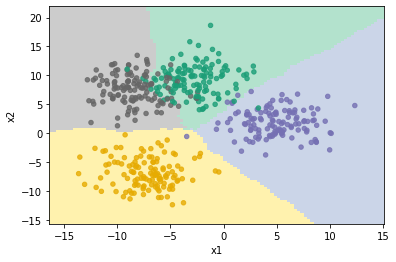

In [8]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(models, X, y)

And just like a normal model, `models` can be scored using the test data:

In [9]:
models.score(test_X, test_y)

0.904